In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.summary.summary_iterator import summary_iterator
import struct

## Get Data

Get the loss and accuracy data from events file generated by tensorboard

In [2]:
def get_data(train_or_val, path): 
    loss_data = {'Step': [], 'Value': []}
    acc_data = {'Step': [], 'Value': []}
    for event in summary_iterator(f'logs/{train_or_val}/events.out.tfevents.{path}.v2'):
        for value in event.summary.value:
            if value.tag == 'epoch_loss': 
                tensor_content = value.tensor.tensor_content
                decoded_value = struct.unpack('<f', tensor_content)[0]
                loss_data['Step'].append(event.step)
                loss_data['Value'].append(decoded_value)
            if value.tag == 'epoch_accuracy':
                tensor_content = value.tensor.tensor_content
                decoded_value = struct.unpack('<f', tensor_content)[0]
                acc_data['Step'].append(event.step)
                acc_data['Value'].append(decoded_value)

    loss_data = pd.DataFrame(loss_data)
    acc_data = pd.DataFrame(acc_data)
    return loss_data, acc_data

## Plotting Learning History

In [3]:
def plot_data(train_acc_data, val_acc_data, train_loss_data, val_loss_data):
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    ax[0].plot(train_acc_data['Step'], train_acc_data['Value'], label='Train')
    ax[0].plot(val_acc_data['Step'], val_acc_data['Value'], label='Validation')
    ax[0].set_title('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(train_loss_data['Step'], train_loss_data['Value'], label='Train')
    ax[1].plot(val_loss_data['Step'], val_loss_data['Value'], label='Validation')
    ax[1].set_title('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

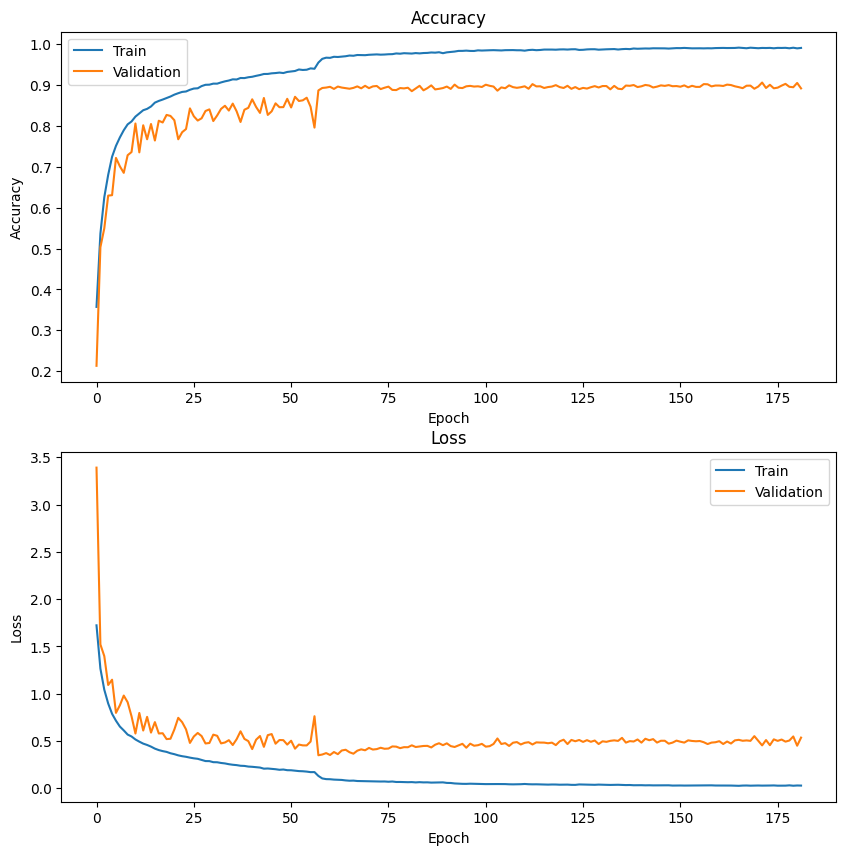

In [5]:
train_loss_data, train_acc_data = get_data("train", "learningrate1")
val_loss_data, val_acc_data = get_data("validation", "learningrate1")
plot_data(train_acc_data, val_acc_data, train_loss_data, val_loss_data)